<a href="https://colab.research.google.com/github/okada-t-rafael/pytorch_study/blob/master/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer Vision

* See reference notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* See reference online book: https://www.learnpytorch.io/03_pytorch_computer_vision

## 0. Computer vision libraries in PyTorch

* [`torchvision`] - base domain library for PyTorch computer vision.
* `torchvision.datasets`- get datasets and data loading functions for computer vision.
* `torchvision.models` - get pre-trained computer vision models that you can leverage for you own problems.
* `torchvision.transforms`- functions for manipulating your vision data (images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.

In [1]:
!pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 5.7 MB/s eta 0:00:00


In [2]:
# Import libraries
import matplotlib.pyplot as plt
import mlxtend
import pandas as pd
import random
import torch
import torchvision

from mlxtend.plotting import plot_confusion_matrix
from pathlib import Path
from timeit import default_timer
from torch import nn
from torch.utils.data import DataLoader
from torchmetrics import ConfusionMatrix
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from tqdm.auto import tqdm
from typing import Any, Callable, Dict, List, Tuple

# Check versions
print(f"torch: {torch.__version__}")
print(f"torchvision: {torchvision.__version__}")
print(f"mlxtend: {mlxtend.__version__}")

torch: 2.1.0+cu118
torchvision: 0.16.0+cu118
mlxtend: 0.22.0


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets: https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",  # where to download data to?
    train=True,  # do we want the training dataset?
    download=True,  # do we want to download?
    transform=ToTensor(),  # how do we want to transform the data?
    target_transform=None)  # how do we want ot transform the labeles/targets?

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None)

100%|██████████| 26421880/26421880 [00:02<00:00, 12718880.25it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200840.19it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3779932.28it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22752662.79it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first traning example
image, label = train_data[0]
image[:, :5], label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# Checkout the shape of our image
print(f"Image shape {image.shape} -> [color_chanels, height, width]")

Image shape torch.Size([1, 28, 28]) -> [color_chanels, height, width]


### 1.1 Visualizing our data

In [9]:
print(f"Image shape: {image.shape}")

Image shape: torch.Size([1, 28, 28])


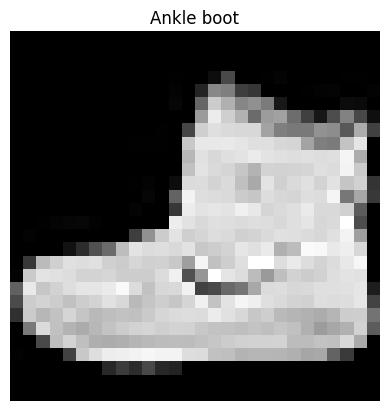

In [10]:
plt.title(class_names[label])
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False);

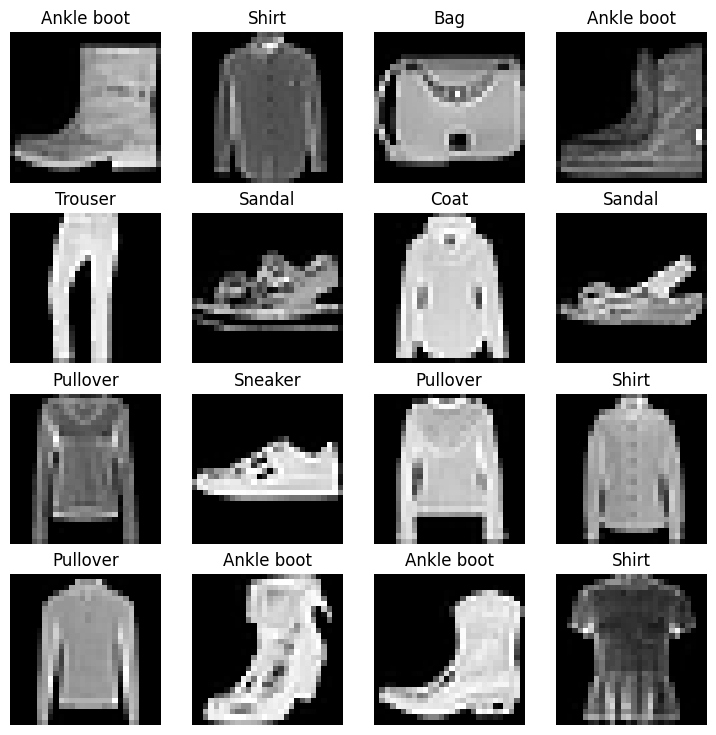

In [11]:
# Plot more imagens
torch.manual_seed(42)
torch.cuda.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets. DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches). Why would we do this?

1. Its is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60.000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more changes to update its gradients per epoch.

For more on mini-batches, see here: https://www.youtube.com/watch?v=4qJaSmvhxi8&t=12s

In [12]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False)

In [13]:
# Let's check out what we've created
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}.")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}.")

Length of train_dataloader: 1875 batches of 32.
Length of test_dataloader: 313 batches of 32.


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6


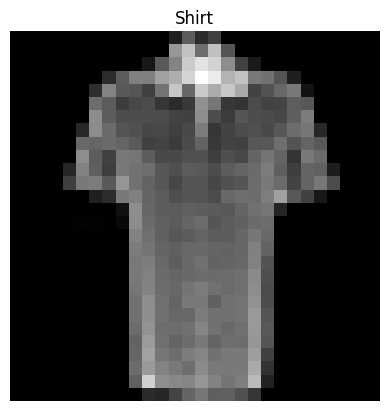

In [15]:
# Show a sample
torch.manual_seed(42)
torch.cuda.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.title(class_names[label])
plt.imshow(img.squeeze(), cmap="gray")
plt.axis(False);

print(f"Image size: {img.shape}")
print(f"Label: {label}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try to improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)  # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height * width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]


In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(
            self,
            input_shape: int,
            hidden_units: int,
            output_shape: int,
            ) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,  # this is 28*28
    hidden_units=10,
    output_shape=len(class_names),  # one for every class
    )

In [19]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
# Pass some random data
dummy_x = torch.rand([1, 1, 28, 28])

model_0.eval()
with torch.inference_mode():
    dummy_y = model_0(dummy_x)

dummy_y

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]])

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - sinze we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [21]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor) -> float:
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        float: Accuracy value between y_true and y_pred (e.g. 78.45)
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [22]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a functino to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values, etc)
2. How fast it runs

In [23]:
def print_train_time(
        start: float,
        end: float,
        device: str,
        ) -> float:
    """Prints difference between start and end time.

    Args:
        start (float): value in seconds to be used as a ref. point in time.
        end (float): value in seconds to be used to calculate the delta time.
        device (str): target device.
    Return:
        float: Difference between start and end in seconds.
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [24]:
# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start = default_timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    # Training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # Forward pass
        y_pred = model_0(X)
        # Calculate loss()
        loss = loss_fn(y_pred, y)
        train_loss += loss
        # Optimizer zero grad
        optimizer.zero_grad()
        # Loss backward
        loss.backward()
        # Gradient descent
        optimizer.step()

        # Print out what's happenin'
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloder
    train_loss /= len(train_dataloader)

    # Testing
    test_loss = 0
    test_acc = 0

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Forward pass
            test_pred = model_0(X_test)
            # Calculate loss
            test_loss += loss_fn(test_pred, y_test)
            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        # Caculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happenin'
    print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.3f}%")

# Calculate training time
train_time_end = default_timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start,
    end=train_time_end,
    device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.039%
Epoch: 1
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.197%
Epoch: 2
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.427%
Train time on cpu: 33.800 seconds


## 4. Make predictions and get Model 0 results

In [25]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

def eval_model(
        model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn: Callable[[torch.Tensor, torch.Tensor], float],
        device: str,
        ) -> Dict[str, Any]:
    """Evaluate the model accuracy given an test dataset.

    Args:
        model (torch.nn.Module): model to be evaluated.
        data_loader (torch.utils.data.DataLoader): dataloader containing the
            test dataset.
        loss_fn (torch.nn.Module): loss function.
        accuracy_fn (Callable[[torch.Tensor, torch. Tensor],float]): accuracy
            function.
        device (str): target device.

    Returns:
        Dict[str, Any]: a dictionary containing the results of model predicting
            on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make our data device agnostic
            X = X.to(device)
            y = y.to(device)
            # Make predictions
            y_pred = model(X)
            # Accumulate the loss and acc per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the avg loss/acc per bach
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc}

In [26]:
# Calculate model_0 results on test dataset
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=next(model_0.parameters()).device.type)

In [27]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using a GPU if there is one)

In [28]:
!nvidia-smi

Thu Oct 26 01:03:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non non-linearity in notebook 02: https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity

In [30]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(
            self,
            input_shape: int,
            hidden_units: int,
            output_shape: int,
            ) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU())

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create an instance of model_1
model_1 = FashionMNISTModelV1(
    input_shape=784,  # this is the output of the flatten after our 28*28 image goes in
    hidden_units=10,
    output_shape=len(class_names),
    ).to(device)  # send to the GPU if it's available

In [32]:
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [33]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [34]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [35]:
def train_step(
        model: torch.nn.Module,
        train_dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn: Callable[[torch.Tensor, torch.Tensor], float],
        device: str,
        ) -> Tuple[float, float]:
    """Performs a training step with model trying to learn on data_loader

    Args:
        model (torch.nn.Module): model to be trained.
        train_dataloader (torch.utils.data.DataLoader): dataloader containing
            the training dataset.
        loss_fn (torch.nn.Modeul): loss function.
        optimizer (torch.optim.Optimizer): optimizer.
        accuracy_fn (Callable[[torch.Tensor, torch. Tensor],float]): accuracy
            function.
        device (string): the target device.

    Returns:
        Tuple[float, float]: average loss and accuracy of training step.
    """
    # Initial setup
    train_loss: float = 0.0
    train_acc: float = 0.0

    # Put model into target device
    model.to(device)
    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        # Put data on target device
        X = X.to(device)
        y = y.to(device)

        # Forward pass (outputs raw logits)
        y_pred = model(X)

        # Calculate loss()
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(
            y_true=y,
            y_pred=y_pred.argmax(dim=1)) # go from logits to prediction labels


        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Gradient descent
        optimizer.step()

        # Print out what's happenin'
        if batch % 400 == 0:
            print(
                f"Looked at {batch * len(X)} / "
                f"{len(train_dataloader.dataset)} samples.")

    # Divide total train loss and acc by length of dataloder
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    return (train_loss, train_acc)

In [36]:
def test_step(
        model: torch.nn.Module,
        test_dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn: Callable[[torch.Tensor, torch.Tensor], float],
        device: str,
        ) -> Tuple[float, float]:
    """Performs a testing step on model going over dataloader.

    Args:
        model (torch.nn.Module): model to be evaluated.
        test_dataloader (torch.utils.data.DataLoader): dataloader containing
            the test dataset.
        loss_fn (torch.nn.Modeul): loss function.
        accuracy_fn (Callable[[torch.Tensor, torch. Tensor],float]): accuracy
            function.
        device (string): the target device.

    Returns:
        Tuple[float, float]: average loss and accuracy of testing step.
    """
    # Setup
    test_loss: float = 0.0
    test_acc: float = 0.0

    # Put moden into target device
    model.to(device)
    # Put model into evaluation mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Put data into target device
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            # Forward pass (outputs raw logits)
            test_pred = model(X_test)
            # Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(
                y_true=y_test,
                y_pred=test_pred.argmax(dim=1))  # go from logits to predition labels

        # Calculate the test loss and acc average per batch
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    return (test_loss, test_acc)

In [37]:
# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start = default_timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    # Training step
    train_loss, train_acc = train_step(
        model=model_1,
        train_dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device)

    # Testing step
    test_loss, test_acc = test_step(
        model=model_1,
        test_dataloader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device)

    # Print out what's happenin'
    print(
        f"Train loss: {train_loss:.4f}, Train acc: {train_acc:.3f}% "
        f"| Test loss: {test_loss:.4f}, Test acc: {test_acc:.3f}%\n")

# Calculate training time
train_time_end = default_timer()
total_train_time_model_1 = print_train_time(
    start=train_time_start,
    end=train_time_end,
    device=next(model_1.parameters()).device.type)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 1.0920, Train acc: 61.343% | Test loss: 0.9564, Test acc: 64.996%

Epoch: 1
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.7810, Train acc: 71.928% | Test loss: 0.7223, Test acc: 73.912%

Epoch: 2
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.6703, Train acc: 75.937% | Test loss: 0.6850, Test acc: 75.020%

Train time on cuda: 32.740 seconds


> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this?
> 1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compte capability than the GPU.
>
> For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [38]:
# Get model_1 results dictionary
model_1_results = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=next(model_1.parameters()).device.type)

In [39]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [40]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this site: https://poloclub.github.io/cnn-explainer/


In [41]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(
            self,
            input_shape: int,
            hidden_units: int,
            output_shape: int,
            ) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units * (7*7),  # there's a trick to calculating this...
                out_features=output_shape),
            )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")

        return x

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = FashionMNISTModelV2(
    input_shape=1,  # image color chanels
    hidden_units=10,
    output_shape=len(class_names),
    ).to(device)

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d()` here: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create a single conv2d layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0)

# Pass the data through the convolutional layer
conv_layer.eval()
with torch.inference_mode():
    conv_output = conv_layer(test_image.unsqueeze(dim=0))

conv_output.shape

torch.Size([1, 10, 62, 62])

In [45]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

See the documentation for `nn.MaxPool2d()` here: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [46]:
test_image.shape

torch.Size([3, 64, 64])

In [47]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Createt a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through max_pool_layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [48]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


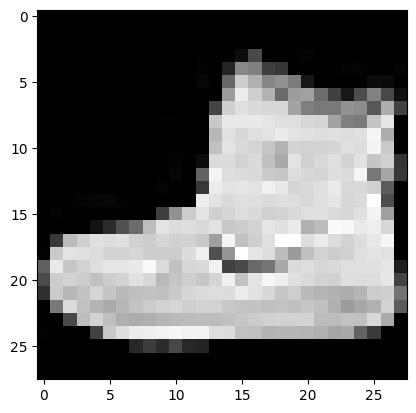

In [49]:
plt.imshow(image.squeeze(), cmap="gray");

In [50]:
# Pass image through model:
model_2.eval()
with torch.inference_mode():
    y_pred = model_2(image.unsqueeze(dim=0).to(device))

y_pred

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0')

### 7.3 Setup a loss function and optimizer

In [51]:
# Setup loss function, optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [52]:
# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start = default_timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    # Training step
    train_loss, train_acc = train_step(
        model=model_2,
        train_dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device)

    # Testing step
    test_loss, test_acc = test_step(
        model=model_2,
        test_dataloader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device)

    # Print out what's happenin'
    print(
        f"Train loss: {train_loss:.4f}, Train acc: {train_acc:.3f}% "
        f"| Test loss: {test_loss:.4f}, Test acc: {test_acc:.3f}%\n")

# Calculate training time
train_time_end = default_timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start,
    end=train_time_end,
    device=next(model_2.parameters()).device.type)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.5943, Train acc: 78.427% | Test loss: 0.3981, Test acc: 85.813%

Epoch: 1
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.3612, Train acc: 87.110% | Test loss: 0.3518, Test acc: 87.001%

Epoch: 2
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.3247, Train acc: 88.277% | Test loss: 0.3260, Test acc: 87.999%

Train time on cuda: 36.692 seconds


In [53]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=next(model_2.parameters()).device.type)

In [54]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32596713304519653,
 'model_acc': 87.99920127795527}

In [55]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [56]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 8. Compare model results and training time

In [57]:
compare_results = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results,
    ])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325967,87.999201


In [58]:
# Add training time to results comparison
compare_results["training_time"] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2,
    ]
compare_results["device"] = [
    next(model_0.parameters()).device.type,
    next(model_1.parameters()).device.type,
    next(model_2.parameters()).device.type,
    ]
compare_results

,model_name,model_loss,model_acc,training_time,device
0,FashionMNISTModelV0,0.476639,83.426518,33.799548,cpu
1,FashionMNISTModelV1,0.685001,75.019968,32.740157,cuda
2,FashionMNISTModelV2,0.325967,87.999201,36.691640,cuda


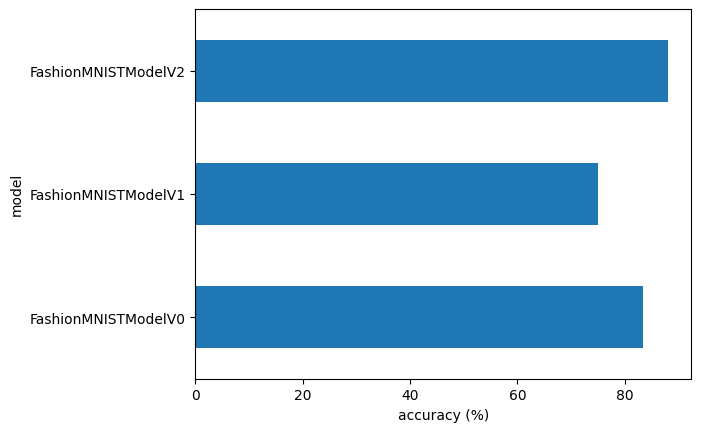

In [59]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [60]:
def make_predictions(
        model: torch.nn.Module,
        data: List[torch.Tensor],
        device: str
        ) -> torch.Tensor:
    """Calculates the model predictions given a list of data.

    Args:
        model (torch.nn.Module): a model to be used in the predictions.
        data (List[torch.Tensor]): list of data to be evaluated.
        device (str): the target device.
    Returns:
        torch.Tensor: a tensor with the predictions probabilities for each
            entry within the data list.
    """
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = sample.unsqueeze(dim=0).to(device)

            # Forward pass (model output raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit to prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [61]:
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

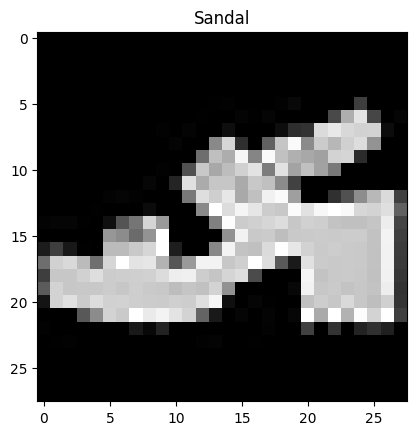

In [62]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]]);

In [63]:
# Make predictions
pred_probs = make_predictions(
    model=model_2,
    data=test_samples,
    device=device)

# View first two prediction probabilities
pred_probs[:2]

tensor([[3.6088e-07, 1.4232e-07, 3.2525e-07, 2.1354e-07, 1.9647e-08, 9.9981e-01,
         2.7218e-07, 1.8140e-05, 2.5277e-05, 1.4086e-04],
        [7.3430e-02, 4.8773e-01, 3.4189e-03, 5.2621e-02, 2.2385e-01, 8.9649e-04,
         1.5675e-01, 3.3045e-04, 3.1815e-04, 6.5718e-04]])

In [64]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

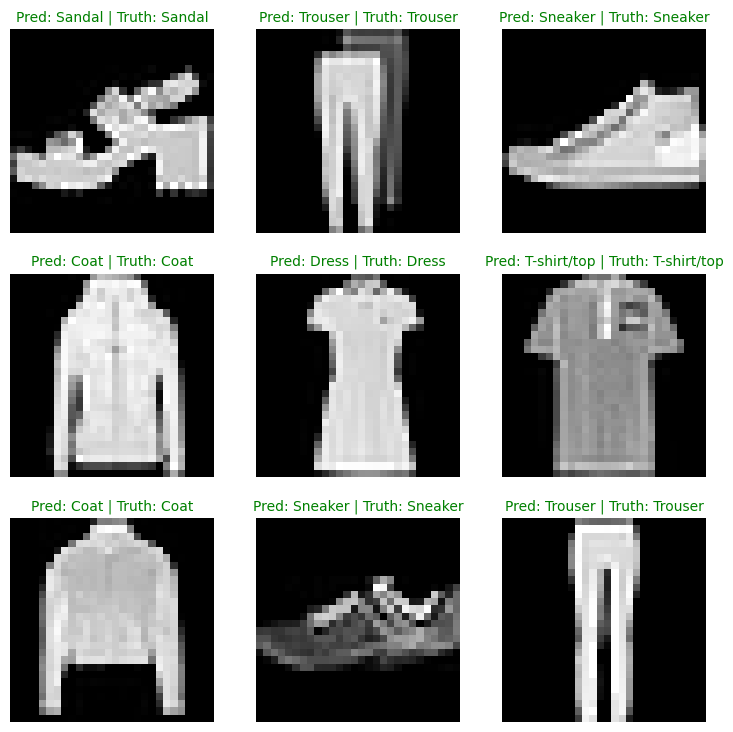

In [65]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`: https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`: http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [66]:
# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send data and labels to target device
        X = X.to(device)
        y = y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [67]:
len(y_pred_tensor)

10000

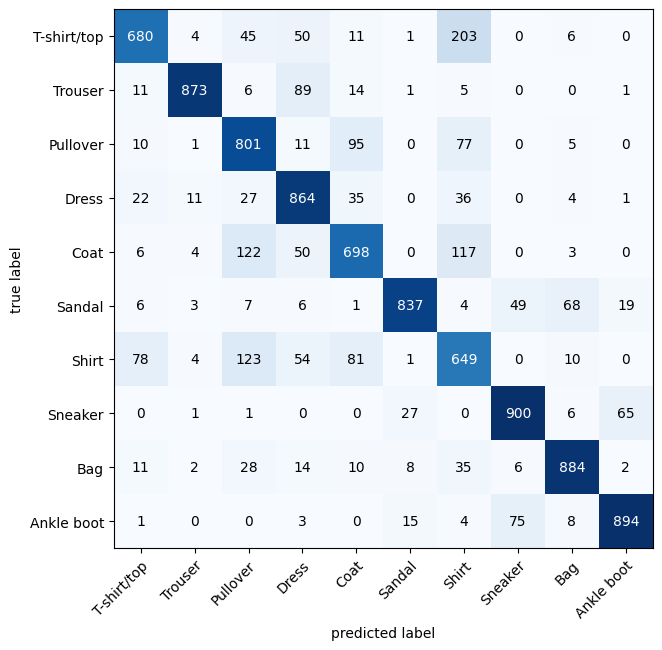

In [68]:
# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(
    num_classes=len(class_names),
    task="multiclass")
confmat_tensor = confmat(
    preds=y_pred_tensor,
    target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7))

In [69]:
# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [70]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create a new instance
loaded_model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [71]:
# Evaluate loaded mode
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=next(model_2.parameters()).device.type)

In [72]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32596713304519653,
 'model_acc': 87.99920127795527}

In [73]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32596713304519653,
 'model_acc': 87.99920127795527}

In [74]:
# Check if model results are close to each other
torch.isclose(
    torch.tensor(model_2_results["model_loss"]),
    torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)